# <div align="center"> ![Logo](https://www.ups.edu.ec/ups_portal-theme/images/ups/home/logo-ups-home.png)
### <div align="center"> Examen Simulacion
## Docente:
### <div align="left"> Ing. Diego Quisi.    
## Alumno:
### <div align="left"> Juan Carlos Cañar Uyaguari.     
<h5><right>21/12/2020 . </right></h5>

Introducción:

El golpe económico de la crisis sanitaria del corona virus no va a ser cosa de semanas, sino de meses. Dentro de una de las etapas importantes que están a la vuelta de la esquina son las elecciones presidenciales y asambleístas del Ecuador. Para ello se plantea realizar un sistema de regresión que permita identificar cual es la tendencia de los votos en base al manejo de las redes sociales (Twitter y/o Facebook) [1].

Las regresiones lineales pueden aprenden por sí mismos y en este caso obtener automáticamente esa “recta” que buscamos con la tendencia de predicción. Para hacerlo se mide el error con respecto a los puntos de entrada y el valor “Y” de salida real [3].

Enunciado:

•	Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:
◦	Obtener datos de tendencia de twitter o facebook, para ello se puede obtener a través del API [4].

•	Title: Titulo del Post/Twitter

•	Word count: la cantidad de palabras del artículo,

•	# of Links: los enlaces externos que contiene,

•	# of comments: cantidad de comentarios,

•	# Shares: compartidos.

•	HashTag
•	Etc.

En base a ello, se pretende proponer y generar una predicción de cuántas veces será compartido un post/twitter  utilizando regresión [2].

•	Posteriormente se debe seguir un procesos de votación de eventos discretos que se describe a continuación:
◦	Tomar los resultados de la regresión para la selección del candidato.
◦	Se tiene una tendencia del 90% de personas que realizan el proceso de elección dentro del Ecuador.
◦	Dentro del procesos se tiene que alrededor del 5% - 10% votan nulo.
◦	Solo se va a tener en cuanta las elecciones de los asambleístas por el Azuay.
◦	Las personas solo tiene un recinto electoral para realizar el proceso.
◦	Las personas solo pueden realizar un proceso de elección por asambleísta del Azuay.
◦	La persona se acerca a la mesa electoral y hacen fila en caso de ser necesario.
◦	Realiza el voto en un tiempo aleatorio de un partido especifico.
◦	La persona recibe su certificado votación.

◦	La persona sale del recinto electoral.
◦	Finalmente generar una grafica de las personas que votaron y los asambleístas electos.
•	El proceso de simulación desarrollado deberá considerar los siguientes aspectos:
◦	Se debe establecer un modelo basado en modelos matemáticos y probabilísticos para la predicción del numero de veces que se compartirá o la tendencia electoral basada en redes sociales.
◦	El programa deberá generar gráficas que indiquen la ecuación matemática y probabilística de tendencias de votaciones.
◦	Deben calcularse las siguientes métricas del sistema de simulación de eventos discretos :
▪	Total de de personas que realizaron el proceso de votación.
▪	Asambleístas ganadores.
▪	El tiempo promedio de espera.

•	Fecha se presentación: 20/12/2020 – 23:55.
•	El informe en pdf (Archivo Notebook)  se deberá subir al Git personal, todo el sistema debe ser basado en Python - Open Source.
•	Cualquier adición o librerías que no se revisaron en clases serán tomada como puntos adicionales al interciclo.


---
- **API key**
    * 4JnLpCHZrSNWA9udcVjdoXPYf
- **API secret key**
    * 3sYWK7vpVCkls36iyf8EVGcPxFmT6F2pXTEZX5PhHxwpyTbEgg
- **Bearer token**
    * AAAAAAAAAAAAAAAAAAAAAC0mKwEAAAAAYgkTE3LFoSVRw8ZahWZH4v5eNv0%3DuXuKi6XaoL2OuGcnUN8Rm7LT8oCKTN4or9TTE8FTRkUmKrUGK6
---

In [66]:
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
%matplotlib inline
from xml.dom import minidom
import json
import tweepy as tw
import pandas as pd
import os
import sys
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from datetime import datetime, timedelta

In [3]:
consumer_key = "4JnLpCHZrSNWA9udcVjdoXPYf"
consumer_secret = "3sYWK7vpVCkls36iyf8EVGcPxFmT6F2pXTEZX5PhHxwpyTbEgg"
access_token = "202024170-280kigS0W8n2icIacC0oapfF0Y70LJU86wdQlFtw"
access_token_secret = "CznuxrXC3zCKSGN9elTBhqRko7geQY3BufGmY2RgQe5qr"

auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth)

In [4]:
results = api.trends_place(id = 375732, exclude = "hashtags")

trends = json.loads(json.dumps(results, indent=1))
 
for trend in trends[0]["trends"]:

    data = pd.DataFrame({'URL':trend['url'],'Nombre':trend['name'],'':trend['tweet_volume']},index=[1])
display(data)

,URL,Nombre,
1,http://twitter.com/search?q=Neme,Neme,None


In [67]:
search_words = "Ecuador"
date_since = "2020-05-14"
new_search = search_words + " -filter:politica"
tweets = api.search(
                           q=new_search,
                           lang="es",
                           result_type='popular')
#tweets
users_locs = [[tweet.user.screen_name, tweet.user.location,tweet.user.favourites_count,tweet.user.statuses_count,tweet.user.followers_count] for tweet in tweets]
users_locs

[['petrogustavo', 'ÜT: 4.650541,-74.074043', 16380, 130454, 4020474],
 ['ecuarauz', 'Ecuador', 4034, 14620, 55938],
 ['Lenin', 'Ecuador', 162, 4174, 1067290],
 ['MashiRafael', 'Ecuador', 570, 63170, 3740664],
 ['evoespueblo', '', 139, 16170, 1182217],
 ['ecuarauz', 'Ecuador', 4034, 14620, 55938],
 ['hermanntertsch', '', 43107, 95916, 242014],
 ['tutoquiroga', 'Bolivia', 54615, 25110, 193665],
 ['VillaFernando_', 'Ecuador', 34841, 28001, 56447],
 ['AlvaroUribeVel', 'Colombia', 238, 85273, 4954157],
 ['CELAGeopolitica', 'América Latina', 3597, 19443, 37620],
 ['elcomerciocom', 'Ecuador', 1376, 276170, 1788083],
 ['elcomerciocom', 'Ecuador', 1376, 276170, 1788083],
 ['LassoGuillermo', '', 1050, 19358, 624272],
 ['elcomerciocom', 'Ecuador', 1376, 276170, 1788083]]

In [68]:
df = pd.DataFrame({'Nombre': list(map(lambda x: x.author.name , tweets)),
                   'Tweet': list(map(lambda x: x.text, tweets)),
                   'rt': list(map(lambda x: x.retweet_count, tweets)),
                   'favoritos': list(map(lambda x: x.favorite_count, tweets)),
                   'seguidores': list(map(lambda x: x.author.followers_count, tweets)),
                   'Caracteres': list(map(lambda x: len(x.text), tweets)),
                   'fecha': list(map(lambda x: x.created_at, tweets))})
df['fecha'] =pd.to_datetime(df.fecha)
df

,Nombre,Tweet,rt,favoritos,seguidores,Caracteres,fecha
0,Gustavo Petro,El progresista Andrés Arauz ganaria la preside...,721,1705,4020474,140,2020-12-19 22:12:19
1,Andrés Arauz,Tengo la responsabilidad de comunicar al Ecuad...,1146,3330,55938,139,2020-12-19 16:32:20
2,Lenín Moreno,¡Nuestro Ecuador se hace sentir! Gracias Carlo...,1813,1781,1067290,140,2020-12-19 15:01:18
3,Rafael Correa,Ola Bini:\nTe pido disculpas en nombre de ECUA...,784,1865,3740664,140,2020-12-19 22:26:54
4,Evo Morales Ayma,En San Benito se creó una comisión integrada p...,599,729,1182217,140,2020-12-20 13:36:34
5,Andrés Arauz,Mi fraterno saludo a los congresistas estadoun...,278,642,55938,140,2020-12-21 02:38:21
6,Hermann Tertsch,Aquí el expresidente boliviano Tuto Quiroga de...,157,184,242014,140,2020-12-20 22:48:05
7,Tuto Quiroga,Miren esta foto: mientras democrátas trabajamo...,177,250,193665,140,2020-12-20 21:29:07
8,Fernando Villavicencio,El correato no solo fue una industria de sobor...,200,343,56447,140,2020-12-21 00:04:56
9,Álvaro Uribe Vélez,"Al fondo Tulcán, Ecuador, visto desde Nariño h...",228,1628,4954157,68,2020-12-20 11:14:13


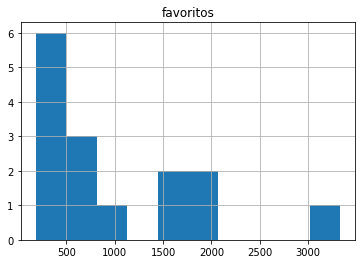

In [69]:
df.drop(['rt','Caracteres', 'seguidores'],1).hist()
plt.show()

183005572 158041 79071 16350


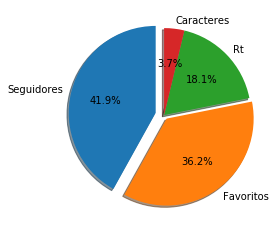

In [71]:
df1 = df.iloc[:, 2:6].cumsum(skipna=False)
#df1.plot(x='seguidores', y=['favoritos','rt', 'Caracteres'],figsize=(5,5))
s = df1['seguidores'].sum()
f = df1['favoritos'].sum()
r = df1['rt'].sum()
c = df1['Caracteres'].sum()
print(s,f,r,c)
Data = {'Tasks': [s,f,r,c]}
df = pd.DataFrame(Data)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Seguidores','Favoritos', 'Rt', 'Caracteres'
sizes = [s/1000, f, r, c]
explode = (0.1, 0.05, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

In [81]:
#Sumamos el numero de seguidores + numero de rt y favoritos para obtener un solo punto 
df1["tot"] = df1[['favoritos','rt', 'Caracteres']].sum(axis=1)
df2 = df1.iloc[:, [2,4]]
df2

,seguidores,tot
0,4020474,2566
1,4076412,7181
2,5143702,10915
3,8884366,13704
4,10066583,15172
5,10122521,16232
6,10364535,16713
7,10558200,17280
8,10614647,17963
9,15568804,19887


### - Regresion lineal

In [82]:
x = list(df2.iloc [:, 0]) # Fecha
y = list(df2.iloc [:, 1]) # Numero de casos
# Creamos el objeto de Regresión Lineal
regr = linear_model.LinearRegression()
print(x)
# Entrenamos nuestro modelo
regr.fit(np.array(x).reshape(-1, 1) ,y)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio

[4020474, 4076412, 5143702, 8884366, 10066583, 10122521, 10364535, 10558200, 10614647, 15568804, 15606424, 17394507, 19182590, 19806862, 21594945]
Coefficients: 
 [0.00104814]
Independent term: 
 4109.8246447484


[2566, 7181, 10915, 13704, 15172, 16232, 16713, 17280, 17963, 19887, 21627, 22243, 23303, 23962, 24714]


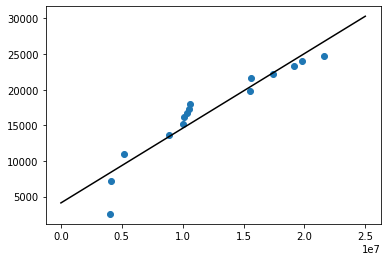

In [83]:
#Graficar

plt.scatter(x, y)
print(y)
x_real = np.array(range(0, 25000000))
#print(x_real)
plt.plot(x_real, regr.predict(x_real.reshape(-1, 1)), color='black')
plt.show()

### - Regresion Probabilistica

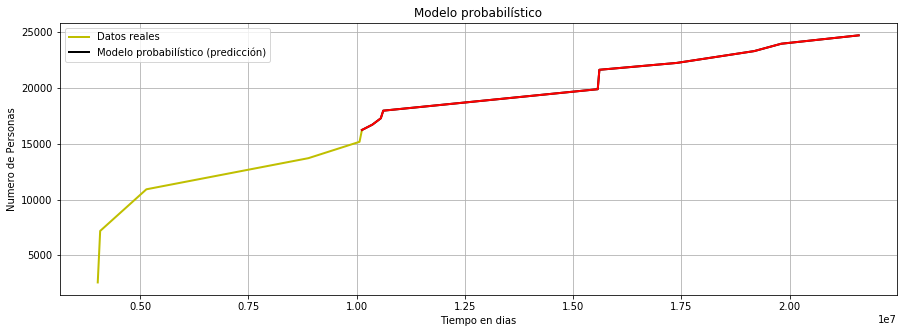

In [87]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(x[:len(x)-9], y[:len(x)-9],'y', alpha=1, lw = 2, label = 'Datos reales')
ax.plot(x[len(x)-10:], y[len(x)-10:],'black', alpha=1, lw = 2, label = 'Modelo probabilístico (predicción)')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.set_title("Modelo probabilístico")
ax.legend()
ax.grid()
x_matematico = x[:]
y_matematico = y[:]
ax.plot(x[len(x)-10:], y[len(x)-10:],'r', alpha=1, lw = 2, label = 'Modelo probabilístico (predicción)')

In [89]:
filtro =df1["tot"]
media = filtro.mean()
mediana = filtro.median()
prediccion = int(y[-1] + mediana)
print('________________________________________________')
print('---------MODELO PROBABILISTICO---------')
print('-PREDICCION ',prediccion)
print('-PREDICCION : ',y[3])
for i in range(x[-1], x[-1]+7):
    x.append(i)
    y.append(int(y[-1] + mediana))
print('________________________________________________')
print('SE ESTIMA QUE LASSO OBTENGA :',y[-1]+7, 'DE VOTOS ')

________________________________________________
---------MODELO PROBABILISTICO---------
-PREDICCION  41994
-PREDICCION :  13704
________________________________________________
SE ESTIMA QUE LASSO OBTENGA : 145681 DE VOTOS 


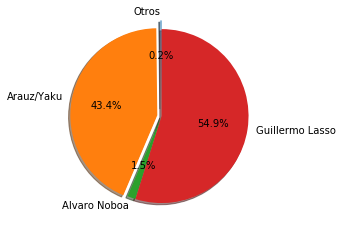

In [131]:
labels = 'Otros','Arauz/Yaku', 'Alvaro Noboa', 'Guillermo Lasso'
sizes = [media, prediccion, y[20], x[1]]
explode = (0.1, 0.05, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig2, ax2 = plt.subplots()
ax2.pie(sizes, labels=labels,explode=explode, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

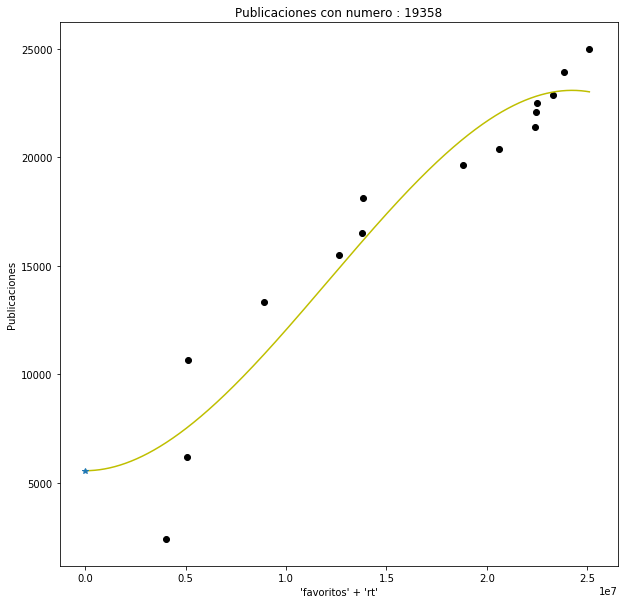

In [140]:
x = list(df2.iloc [:, 0]) # Estados
y = list(df2.iloc [:, 1]) # Total de la suma
z = api.get_user('LassoGuillermo').statuses_count

pf = PolynomialFeatures(degree = 3)
X = pf.fit_transform(np.array(x).reshape(-1, 1))
regresion_lineal = LinearRegression()
regresion_lineal.fit(X, y) 
pred_x = list(range(0,max(x)+50))

puntos = pf.fit_transform(np.array(pred_x).reshape(-1, 1))
prediccion_entrenamiento = regresion_lineal.predict(puntos)
respuesta =  round(-(prediccion_entrenamiento[z]))
plt.figure(figsize=(10,10))
plt.title('Publicaciones con numero : ' + str(z))
plt.plot(pred_x, prediccion_entrenamiento, color='y')
plt.scatter(x,y,label="Datos Reales",color="black")
plt.xlabel("'favoritos' + 'rt'")
plt.ylabel("Publicaciones")
plt.plot(z,prediccion_entrenamiento[z], '*')
plt.show()

### POPULARIDAD

POPULARIDAD POR SEGUIDORES


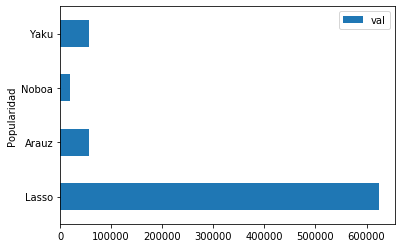

In [124]:
ara = api.get_user('ecuarauz').followers_count
albn = api.get_user('AbAlvaroNoboa').followers_count
las = api.get_user('LassoGuillermo').followers_count
yaku = api.get_user('yakuperezg').followers_count

df = pd.DataFrame({'Popularidad': ['Lasso', 'Arauz', 'Noboa','Yaku'], 'val': [las, ara, albn,yaku]})
ax = df.plot.barh(x='Popularidad', y='val')
print('POPULARIDAD POR SEGUIDORES')

POPULARIDAD POR ESTADOS


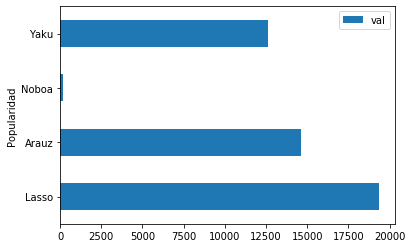

In [127]:
ara = api.get_user('ecuarauz').statuses_count
albn = api.get_user('AbAlvaroNoboa').statuses_count
las = api.get_user('LassoGuillermo').statuses_count
yaku = api.get_user('yakuperezg').statuses_count

df = pd.DataFrame({'Popularidad': ['Lasso', 'Arauz', 'Noboa','Yaku'], 'val': [las, ara, albn,yaku]})
ax = df.plot.barh(x='Popularidad', y='val')
print('POPULARIDAD POR ESTADOS')

POPULARIDAD POR FAVORITOS


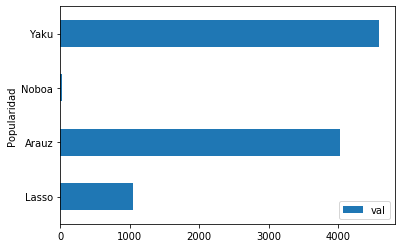

In [128]:
ara = api.get_user('ecuarauz').favourites_count
albn = api.get_user('AbAlvaroNoboa').favourites_count
las = api.get_user('LassoGuillermo').favourites_count
yaku = api.get_user('yakuperezg').favourites_count

df = pd.DataFrame({'Popularidad': ['Lasso', 'Arauz', 'Noboa','Yaku'], 'val': [las, ara, albn,yaku]})
ax = df.plot.barh(x='Popularidad', y='val')
print('POPULARIDAD POR FAVORITOS')

Posteriormente se debe seguir un procesos de votación de eventos discretos que se describe a continuación: ◦ Tomar los resultados de la regresión para la selección del candidato. ◦ Se tiene una tendencia del 90% de personas que realizan el proceso de elección dentro del Ecuador. ◦ Dentro del procesos se tiene que alrededor del 5% - 10% votan nulo. ◦ Solo se va a tener en cuanta las elecciones de los asambleístas por el Azuay. ◦ Las personas solo tiene un recinto electoral para realizar el proceso. ◦ Las personas solo pueden realizar un proceso de elección por asambleísta del Azuay. ◦ La persona se acerca a la mesa electoral y hacen fila en caso de ser necesario. ◦ Realiza el voto en un tiempo aleatorio de un partido especifico. ◦ La persona recibe su certificado votación

In [17]:
import simpy
import random
import matplotlib.pyplot as pp
import math
NUM_VOTANTES = 270 
NUM_RECINTO = 1
NUM_ASAMBLEISTAS = 5
NUM_CANDIDATOS = 90 
NUM_RECINTO = 1  
NUM_MENSAS = 3
T_LLEGADAS = 20
TIEMPO_SIMULACION = 120
TOT_CLIENTES = 5

TIEMPO_ESPERA  = 0.0 # tiempo de espera total
DURACION_TOTAL  = 0.0 # duracion de servicio total
FIN = 0.0 # minuto en el que finaliza

Current Time = 07:42:58
************ Simulacion Elecciones ************
ESCRIBA NUMERO DE VOTANTES( EJEMPLO 8)): 9
Tiempo promedio asignado para recibir  9 personas el carnet 


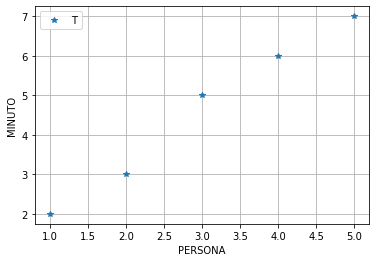

--------------------------------------------------------------------
La persona  0 Obtiene Certificado en  0.7
Sufraga votante  0  llego en minuto:  12.357767874449124 07:42:58
Sufraga votante  0  pasa a vota en  2020-12-20 14:42:00  minutos esperando 3.0
Sufraga votante  0  vota en  1 2020-12-20 14:42:00  minutos
Sufraga votante  0  Sale en minuto:  13.357767874449124 07:42:58
--------------------------------------------------------------------
La persona  1 Obtiene Certificado en  1.5
Sufraga votante  1  llego en minuto:  37.17074959460619 07:42:58
Sufraga votante  1  pasa a vota en  2020-12-20 14:42:00  minutos esperando 3.0
Sufraga votante  1  vota en  2 2020-12-20 14:42:00  minutos
Sufraga votante  1  Sale en minuto:  39.17074959460619 07:42:58
--------------------------------------------------------------------
La persona  2 Obtiene Certificado en  0.6
Sufraga votante  2  llego en minuto:  46.67103921721893 07:42:58
Sufraga votante  2  pasa a vota en  2020-12-20 14:42:00  minutos

In [63]:
now = datetime.now()
current_time = now.strftime("%H:%M:%S")
print("Current Time =", current_time)
datetime_original = datetime(year=2020, month=12, day=20)
## Adding Minutes
minutes_to_add = 3
datetime_new = datetime_new + timedelta(minutes = minutes_to_add)

llegada = lambda x, time : print (x," llego en minuto: ", time,current_time) #Imprime Llegada
salida = lambda x, time : print (x," Sale en minuto: ", time,current_time) #Imprime Salida
pasar_v = lambda x, time, esp : print(x, " pasa a vota en ", datetime_new, " minutos esperando", esp+3) # timE
votacion = lambda x, time : print(x, " vota en ", time,datetime_new, " minutos") #Imprime Votacion

def votar(persona):
    global DURACION_TOTAL 
    tiempo_votar = random.randint(1,5)
    yield env.timeout(tiempo_votar)
    votacion(persona, tiempo_votar)
    DURACION_TOTAL = DURACION_TOTAL + tiempo_votar # suma total de tiempo

def persona (env, name, mesas):
    global TIEMPO_ESPERA
    global FIN
    llega = env.now # minuto de llegada de persona
    llegada(name, llega)
    with mesas.request() as request: #Esperamos pasaar a mesas
        yield request # Obtiene turno
        pasa = env.now # Guarda el minuto cuado comienza a ser atendido
        espera = pasa - llega # Calcula el tiempo que espero
        TIEMPO_ESPERA = TIEMPO_ESPERA + espera # Acumula los tiempos de espera
        pasar_v(name, pasa, espera)
        yield env.process(votar(name)) # Invoca al de votar
        deja = env.now #Guarda el minuto en que termina el proceso votar 
        salida(name, deja)
        FIN = deja # Conserva globalmente el ultimo minuto de la simulacion


def elecciones(env, personal):
    llegada = 0
    i = 0
    for i in range(TOT_CLIENTES): # Para n clientes
        R = random.random()
        llegada = -T_LLEGADAS * math.log(R) # Distribucion exponencial
        yield env.timeout(llegada)  # Deja transcurrir un tiempo entre uno y otro
        print("--------------------------------------------------------------------")
        env.process(persona(env, 'Sufraga votante  %d' % i, personal)) 
        print('La persona ',i, 'Obtiene Certificado en ',round(llegada*0.06,1))
        
def graficar(x,y,z):
    #print('**.',b1,b0,predecir)
    plt.plot(x,y,"*") 
    plt.xlabel('PERSONA')
    plt.ylabel('MINUTO')
    plt.legend('Tiempo')
    plt.grid(True)
    plt.show()
print ("************ Simulacion Elecciones ************")
z=cantidad = float(input("ESCRIBA NUMERO DE VOTANTES( EJEMPLO 8)): "))
print('Tiempo promedio asignado para recibir ',round(z), 'personas el carnet ')
x=[1,2,3,4,5]
y=[2,3,5,6,7]
graficar(x,y,z)
random.seed (30)  # Cualquier valor
env = simpy.Environment() # Crea el objeto entorno de simulacion
personal = simpy.Resource(env, NUM_MENSAS) #Crea las mesas
env.process(elecciones(env, personal)) #Invoca el proceso princial
env.run() #Inicia la simulacion

### Concluciones
###### Mediante esta practica usamos tweepy que es el api oficial de twitter, mediante el cual nos permite saber la informacion mas relevante de twitter, en este caso queriamos saber sobre los datos y estadisticas de los candidatos mas populares, para poder realizar un analisis, a ver que candidato es el mas popular en dicha red.

##### Anexos: 
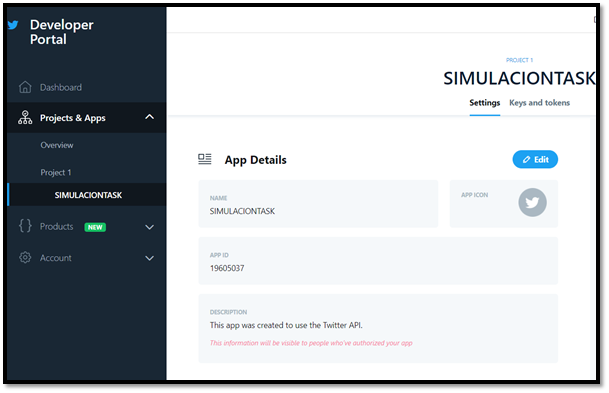

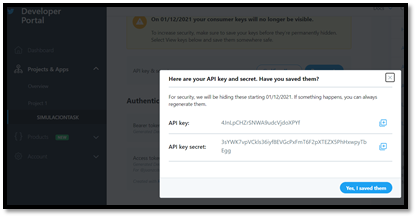

### Recomendaciones
##### Tener instalado la libreria tweepy, mediante la cual consumimos datos de twitter
##### Librerias como sympy que nos permite simular las votaciones 

Referencias:
[1]: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6291769/
[2]: https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/
[3]: https://eprints.ucm.es/48804/1/TFM%20Manuel%20Alejandro%20Rodriguez%20Santana.pdf
[4]: http://opac.pucv.cl/pucv_txt/txt-8000/UCC8094_01.pdf